In [15]:
using LinearAlgebra, Plots

For symmetric $A$, the critical points of $x^T A x$ subject to $||x||_2 = 1$ are eigenvectors of $A$:

$C(x) = x^T A x - \lambda (1-x^Tx)$

$\nabla_x C(x) = 0 => 2Ax - 2\lambda x = 0 => Ax = \lambda x$

$A$ must be symmetric (or hermitian) for eigenvectors to be critical points, otherwise $\nabla_x x^TAx = (A^T+A)x \neq 2Ax$.

Constraint $||x||_2=1$ is also required since it prevents critical point to be $x=0$.

This type of objectives are ubiquitous. Some examples are given below.

__Example 1 (PCA):__ Consider $N$ instances $x^{1:N}$ where each instance $x^i$ has $d$ features. All these data points are represented with $N \times d$ dimensional matrix $X$ and the mean of the feautures and covariance between the features are $d$ and $d \times d$ dimensional $\mu$ and $\Sigma$, respectively. Sometimes some of the features are highly correlated so not all the features are informative. We may then find a new lower dimensional ($k$ s.t. $k<d$) space where the data instances are scattered well and easily seperable. Let's get started with the first new dimension. Suppose a unit vector $q_1$ lies on this one-dimensional space. Then the projection of an instance $x^i$ on this space is $z_1^i = q_1^T x^i q_1$. Doing this projection to all instances we get $z_1^{i:N}$ with mean $m_1 = q_1^T \mu q_1$ and variance $v_1 = q_1^T \Sigma q_1$. In order for these new instances to be scattered as much as possible, we want variance $v_1$ to be maximum. Therefore our task becomes: $\underset{q_1}{\text{max }} q_1^T \Sigma q_1$ subject to $q_1^T q_1 = 1$. This objective is maximized with the largest eigenvalue of $\Sigma$:

$\underset{q_1}{\text{max }} q_1^T \Sigma q_1 - \lambda(1 - q_1^T q_1) => \Sigma q_1 = \lambda q_1$.

We want second one-dimensional new space to maximize the variance, as well. We introduce unit variance $q_2$ which is supposed to be orthogonal to $q_1$: 

$\underset{q_2}{\text{max }} q_2^T \Sigma q_2 - \lambda_1(1 - q_2^T q_2) - \lambda_2(0-q_2^T q_1) => \Sigma q_2 - \lambda_1 q_2 - 0.5 \lambda_2 q_1 = 0$

Multiplying with $q_1^T$, the above equation turns into $\underbrace{q_1^T \Sigma q_2}_{\lambda q_1^T q_2 = 0} - \underbrace{\lambda_1 q_1^T q_2}_{0} - 0.5 \lambda_2 q_1^T q_1 = 0$

So $\lambda_2 = 0$ => $\Sigma q_2 = \lambda_1 q_2$ => $q_2$ is the second largest eigenvector. In a similar fashion, we can extend it to $k$ dimension.

__Example 2 (Differential equations):__ Many dynamical systems can be formulated in the form of $y' = B y$. Assume we know the $k$ eigenvectors of $B$ which are $y_1, y_2, ..., y_k$. Writing the initial condition by using these eigenvectors, we can make the analysis of the state of this dynamical system at time t:

$
y(0) = c_1 y_1 + c_2 y_2 + ... + c_k y_k \\
y(t) = c_1 e^{\lambda_1 t}y_1 + c_2 e^{\lambda_2 t}y_2 + ... + c_k e^{\lambda_k t}y_k
$

In many situations, it is expensive to find the eigenvectors and $B$ may change over time.

__Example 3 (Spectral Embedding):__ For a given collection of data instances (such as photos, documents, twitter acounts), we may want to locate them in a lower dimensional space such that similar instances will be close to each other. In one dimensional space, this task refers to locating the instances on numerical axis. Similiarity between instances $i$ and $j$ is scored with $w_{ij} = w_{ji} \geq 0$. This score can be based on any reasonable similiarity metric (such as sth based on pixel values, frequency of words appear in documents, or a graph structure that indicates the connections between the accounts). Instances $i$ and $j$ takes the values $x_i$ and $x_j$ on the numerical axis and all the values are stored in the vector $x = [x_1, x_2, ... ]$. We introduce an energy function to minimize to achieve this setting: $E(x) = \sum\limits_{ij}w_{ij}(x_i-x_j)^2$. Note that this would be minimized by setting all numbers to zero or equal to each other. We avoid these circumstances by additional two constraints that are $||x||_2^2 = 1$ and $1_d^T x = 0$ where $1_d^T$ is $d$ dimensional vector of ones. So the overall objective is:

$
\underset{x}{\text{min }} E(x) \text{ subject to } ||x||_2^2 = 1 \text{ and } 1_d^T x = 0. \\
E(x) = \sum\limits_{ij}w_{ij}(x_i-x_j)^2 = \sum\limits_{ij} w_{ij}(x_i^2-2x_ix_j+x_j^2)
= \sum\limits_{i} a_i x_i^2 -2 \sum\limits_{ij}w_{ij}x_ix_j + \sum\limits_{j} a_j x_j^2
= 2 x^T (A-W) x
$

where $W$ is the matrix of similarity scores, $a = W 1_d = W^T 1_d$ and $A=diag(a)$.

So the task is minimizing $x^T (A-W) x$ subject to $||x||_2^2 = 1$ and $1_d^T x = 0$. Note that $A-W$ is a symmetric matrix. Indeed it is also positive semi-definite since it is diagonally dominant matrix (https://en.wikipedia.org/wiki/Diagonally_dominant_matrix#Applications_and_properties) (A Hermitian diagonally dominant matrix with real non-negative diagonal entries is positive semidefinite.). Since it is a symmetric positive semi-definite matrix, its all eigenvalues are real and nonnegative. Indeed $0$ is the smallest eigenvalue of $A-W$ with eigenvector $1_d$:

$
(A-W) 1_d = A 1_d - W 1_d = a - a = 0_d = 0 \cdot 1_d
$

However, this eigenvector violates the constraints. So we choose the eigenvector with the second smallest eigenvalue as the solution to the problem. The dimensionality of the manifold can be increased by simply going to the other small eigenvectors in order.

__Proof:__ $C(x) = 2 x^T (A-W) x - \lambda_1 (1-x^Tx) - \lambda_2(1_d^T x)
\\ \nabla_x C(x) = 4(A-W)x + 2 \lambda_1 x - \lambda_2 1_d = 0
$

Multiplying both sides of equality with $1_d^T$ from left, we reach

$
4 \cdot \underbrace{1_d^T(A-W)}_{0}x + 2 \lambda_1 \underbrace{1_d^Tx}_{0} - d \cdot \lambda_2 = 0 \text{ so, } \lambda_2 = 0
$

Therefore $2(W-A)x = \lambda_1 x$. We don't accept $\lambda_1 = 0$ which and corresponding eigenvector $1_d$. Instead, we take the second smallest eigenvalue's corresponding eigenvector as the solution.

__Spectrum:__ Spectrum of a matrix $A$ is the set of all its eigenvalues. The eigenvalue with the maximum length $|\lambda|$ is the spectral radius $\rho(A)$ of the matrix.

__Note:__ Eigenvectors that corresponds to an eigenvalue $\lambda$ are not unique because if $x$ is an eigenvector of $A$ with eigenvalue $\lambda$, $cx$ with constant $c$ has also same eigenvalue: $Acx = c Ax = \lambda cx$. Often we constraint the eigenvectors with those with unite lengths $||x||_2 = 1$. This constraints the eigenvecctors to $\pm x$.

In [2]:
A = [1.0 0.0 2.1; 0.0 3.0 4.5; 0.4 0.0 18.0]

3×3 Array{Float64,2}:
 1.0  0.0   2.1
 0.0  3.0   4.5
 0.4  0.0  18.0

In [3]:
vals, vecs = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
  0.9507310254033996
  3.0               
 18.0492689745966   
eigenvectors:
3×3 Array{Float64,2}:
 -0.998402   0.0  -0.117196
 -0.0514367  1.0  -0.28451 
  0.0234239  0.0  -0.951482

In [4]:
@show norm(vecs[:,1])
@show norm(vecs[:,2])
@show norm(vecs[:,3])
;

norm(vecs[:, 1]) = 1.0
norm(vecs[:, 2]) = 1.0
norm(vecs[:, 3]) = 0.9999999999999999


In [5]:
println(A*(12 .* vecs[:,1]))
println(vals[1].*(12 .* vecs[:,1]))
;

[-11.390535565327312, -0.5868294788810013, 0.2672380987665619]
[-11.390535565327307, -0.5868294788810017, 0.26723809876656174]


__Remark:__ Eigenvalue decomposition is defined only for square ($n \times n$ dimensional) matrices. Considering the definition $Ax = \lambda x$, we can write it as $(A- \lambda \cdot I_{n \times n})x = 0$. Since $x \neq 0$, $\lambda$ is the value that makes $A- \lambda \cdot I_{n \times n}$ singular.

__Remark:__ All square matrices has at least one eigen vector. Many of them have complex valued elements.

In [6]:
A = randn(5,5)
eigen(A)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
5-element Array{Complex{Float64},1}:
 -0.5149423637867293 - 1.8034173234068798im
 -0.5149423637867293 + 1.8034173234068798im
  0.1721709402586028 + 0.0im               
  1.2793276099310393 - 0.5724825803187628im
  1.2793276099310393 + 0.5724825803187628im
eigenvectors:
5×5 Array{Complex{Float64},2}:
 -0.287665+0.139391im  -0.287665-0.139391im  …   0.126574-0.313537im 
  0.750082-0.0im        0.750082+0.0im           0.107082-0.0700612im
 -0.187668+0.273997im  -0.187668-0.273997im     -0.277604+0.0608737im
 0.0542576+0.314658im  0.0542576-0.314658im      0.278132-0.034701im 
  0.318598+0.146442im   0.318598-0.146442im     -0.842596+0.0im      

__Remark:__ Eigenvectors that corresponds to different eigenvalues are linearly independent. So $n \times n$ matrix can have n distinct eigenvalues at most.

__Geometric multiplicity:__ Geometric multiplicity of an eigenvalue $\lambda$ is the maximum number of linearly independent eigenctors that correspond to this eigenvalue.

__Nondefective (Digonalizable) Matrix:__ Matrix $A \in \mathbb{R}^{n \times n}$ is diagonalizable if a diagonal matrix $\Lambda = X^{-1}AX$ exists. In other words, if eigenvectors of $A$ span $\mathbb{R}^{n}$, then $X$ is invertible so $A$ is nondefective.

In [7]:
A = [1 0 0; 0 2 0; 0 0 2]

3×3 Array{Int64,2}:
 1  0  0
 0  2  0
 0  0  2

In [8]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 1.0
 2.0
 2.0
eigenvectors:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

Above example, A is nondefective since it has 3 independent vectors. Note that 2 of them has the same eigenvalue.

In [9]:
A = [2 1; 0 2]

2×2 Array{Int64,2}:
 2  1
 0  2

In [10]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 2.0
 2.0
eigenvectors:
2×2 Array{Float64,2}:
 1.0  -1.0        
 0.0   4.44089e-16

In this example $A$ is defective since it has only one independent eigenvector! It is not diagonalizable since $X$ is not invertable. 

__Similar matrices:__ Matrices $A$ and $B$ are similar, if we can write $B = T^{-1} A T$. Similar matrices has same eigenvalues. To see that, assume $Bx = \lambda x$. Then $\lambda x = T^{-1} A T x$ which implies $\lambda (Tx) = A (Tx)$. Therefore $A$ has an eigenvector $Tx$ with eigenvalue $\lambda$. This is an important observation becuase it shows that similiarity transformations applied on $A$ does not change its eigenvalues but its eigenvectors.

## Hermitian and Positive Definite Matrices

- All eigenvalues of hermitian matrices are real.

- Eigenvectors corresponding to distinct eigenvalues of Hermitian matrices are orthogonal.

__Spectral Theorem:__ All hermitian metrices are non-defective so all of its eigenvectors are linearly independent (orthogonal). Having the constraint that eigenvectors are unit vectors, all of its eigenvectors are orthonormal. This means that eigenvalue decomposition of a hermitian matrix A is $A = Q \Lambda Q^{*}$. 

__Proof:__ Assume $x$ and $y$ are eigenvectors of hermitian $A$ with distinct eigenvalues $\lambda_1$ and $\lambda_2$. We know that $<Ax,y> = <x,A^*y>$ where $<a,b>$ is the inner product $a^* b$.

$\lambda_1<x,y> = <\lambda_1 x,y> = <Ax,y> = <x,A^*y> = <x,Ay> = <x,\lambda_2 y> = \lambda_2<x,y>$.

Since $\lambda_1 \neq \lambda_2$, $<x,y>$ must be equal to 0. So they are orthogonal. Because they have unit length, they are orthonormal.

__Ex:__ Suppose we want to solve $Ay=b$ for $y$ given symmetric $A$ with eigenvectors $x_1, x_2, ..., x_n$ and corresponding eigenvalues $\lambda_1, \lambda_2, ..., \lambda_n$. Because these eigenvectors span the $\mathbb{R}^n$, we can write $b$ as $b = \sum \limits_{i=1}^{n}c_i \cdot x_i$. Solving the $y$: $y = A^{-1} \sum \limits_{i=1}^{n}c_i \cdot x_i = \sum \limits_{i=1}^{n}\frac{c_i}{\lambda_i} \cdot x_i$.

__Remark:__ Although its eigenvectors are orthonormal to each other, which makes hermitian metrices nondefective, eigenvectors does not have to be distinct. For example identity matrix $I_{n \times n}$ has $n$ independent eigenvectors, they all have the same eigenvalue which is 1.

__Note:__ All eigenvalues of positive definite matrices are positive.

## Power Iteration

Power iteration is an algorithm to find the eigenvalue with the largest magnitude and corresponding eigenvector of a matrix $A$.

__Rayleigh Quotient:__ Rayleigh quotient of a vector $x$ is a scalar value. If $x$ is eigenvector of $A$, then it is the corresponding eigenvalue. $r(x) = \frac{x^T A x}{x^T x}$.

__Power iteration:__ Suppose $A \in \mathbb{R}^{n \times n}$ is a symmetric matrix eigenvalues of which are ordered as $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_n$. Therefore its eigenvectors $\{x_1, x_2, ..., x_n\}$ span $\mathbb{R}^{n}$ and we can write any vector $v \in \mathbb{R}^{n}$ as linear combination of eigenvectors of $A$: $v = c_1 \cdot x_1 + c_2 \cdot x_2 + ... + c_n \cdot x_n$. Multiplying both sides of equality with $A$ over and over again yields:

$$
Av = c_1 \cdot \lambda_1 \cdot x_1 + c_2 \cdot \lambda_2 \cdot x_2 + ... + c_n \cdot \lambda_n \cdot x_n = \lambda_1 \left(c_1 \cdot x_1 + c_2 \cdot \frac{\lambda_2}{\lambda_1} \cdot x_2 + ... + c_n \cdot \frac{\lambda_n}{\lambda_1} \cdot x_n \right) \\
A^k v = \lambda_1^k \left(c_1 \cdot x_1 + c_2 \cdot \left(\frac{\lambda_2}{\lambda_1}\right)^k \cdot x_2 + ... + c_n \cdot \left(\frac{\lambda_n}{\lambda_1}\right)^k \cdot x_n \right) \\
A^k v \approx c_1 \lambda_1^k \cdot x_1
$$

In [11]:
A = [2.1 4.6 -0.3; 4.6 -2.5 -0.6; -0.3 -0.6 1.3]

3×3 Array{Float64,2}:
  2.1   4.6  -0.3
  4.6  -2.5  -0.6
 -0.3  -0.6   1.3

In [12]:
w = randn(3)
v = w ./ norm(w)
l_old = v' * A * v
diff = Inf
while diff>1e-8
    w = A*v
    v = w ./ norm(w)
    l = v' * A * v #Rayleigh
    diff = abs(l-l_old)
    l_old = l
end
@show l_old
@show v;

l_old = -5.3617156679369815
v = [0.5224151738143819, -0.8510360191823104, -0.053104427525539774]


In [13]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 -5.36171573912149  
  1.2311918023168267
  5.030523936804669 
eigenvectors:
3×3 Array{Float64,2}:
  0.522485  0.156913   -0.838086
 -0.850993  0.0347334  -0.524028
 -0.053117  0.987002    0.151679

### Finding other eigen components

Simply, apply power iteration to a randomly initialized vector by first subtracting its component on the eigenvector with the largest eigenvalue so that $v = c_2 \cdot x_2 + ... + c_n \cdot x_n$.

In [14]:
p(w) = v' * w * v #projection of w onto the eigenvector with the largest eigenvalue

w2 = randn(3)
w2 -= p(w2)
v2 = w2 ./ norm(w2)
l_old2 = v2' * A * v2
diff = Inf
while diff>1e-8
    w2 = A*v2
    v2 = w2 ./ norm(w2)
    l2 = v2' * A * v2 #Rayleigh
    diff = abs(l2-l_old2)
    l_old2 = l2
end
@show l_old2
@show v2;

l_old2 = 5.030523738176235
v2 = [0.8381609095691959, 0.5239110774581173, -0.151668957228606]


# Example: Spectral Clustering

In [25]:
points_untidy = [1.8041 0.6784 2.0438 1.3186 1.7267 1.0516 -0.3849 -0.7118 0.6754 1.7853 0.5495 1.7915 0.7096 2.0687 1.5394 -0.0084 -0.6608 0.9144 1.7801 1.3404 0.1777 -0.1121 -1.0558 0.3911 1.0338 -0.0374 1.7965 0.6487 -1.0000 -0.4010 -0.7828 -0.8704 -1.1899 -0.1892 -1.0406 -0.4323 1.5998 0.0093 1.6721 0.5654 -0.2042 -0.9981 1.8053 0.3997 -0.1179 0.6405 1.8531 1.1769 -0.7254 -0.0714 1.1200 1.8603 1.2711 -0.1937 1.4852 -0.3463 0.1551 0.7342 0.2080 -0.8365 0.0353 -1.0441 0.7240 0.6787 0.1960 -0.9874 0.6123 0.8548 1.6875 0.4047 1.7907 0.0139 0.4619 -0.8482 -0.2108 -0.9427 1.9062 1.3045 0.6965 -0.7017 -0.1498 -0.8879 0.4032 1.8863 1.1981 -0.1201 0.5038 0.6427 -0.8036 0.7512 -0.3867 0.9984 -0.9929 0.0796 0.8957 1.9576 0.6104 1.8812 1.8283 0.3746 -0.0384 -0.9373 -1.0897 -0.1580 -0.5749 -0.8707 -1.0135 -0.2355 1.5883 1.3974 -0.1382 -0.9088 1.6112 1.0404 1.7054 0.6626 -0.0826 0.7480 -0.1706 -0.9147 -0.8070 -0.4935 -0.2230 0.8121 1.0266 1.8979 1.6877 1.5232 1.6596 1.6200 2.1073 0.7092 0.6942 1.7704 -0.9167 0.0697 -1.1005 0.7904 -0.5194 0.6836 -0.4495 -1.0545 1.7844 0.9555 0.3844 -0.9948 0.3000 1.6577 1.5980 1.4144 -0.9080 -0.0232 -0.6166 0.6981 1.6930 1.5175 0.9481 1.9875 1.5416 0.2478 0.9958 -0.0008 0.2080 -1.0085 -0.6968 -0.6995 0.5853 -0.8335 0.5270 0.9143 0.8920 -0.2195 1.1748 1.7588 0.0870 0.9883 -0.7729 -0.5863 -0.1664 -1.0489 0.6559 1.0658 0.4165 0.1672 1.3890 0.1669 -0.8468 -0.5381 0.3040 -0.1485 -0.0159 -0.9139 -1.0051 -0.3978 0.8693 1.7659 -0.3754 1.0541 0.6383 -0.7723 0.6444 0.5768 0.6842 1.1894 0.1941 1.6765 1.7583 1.0854 0.3221 1.7879 -0.3032 0.8039 -1.1221 0.1256 1.4760 1.4537 1.2173 1.8821 1.7455 1.4349 -1.0465 0.4358 -0.9252 -0.6406 1.4218 1.8117 -0.8154 0.2656 2.3067 0.8224 0.7337 0.2999 1.1844 1.8742 1.8210 0.8082 0.1613 0.8070 1.4788 1.5544 -0.6026 0.5581 1.8762 1.2258 0.3064 1.2996 0.4089 1.7655 1.2606 -0.0482 1.2922 -0.0085 0.7427 -0.2490 0.6985 -0.5397 -0.1776 0.7448 1.4060 1.8302 0.4664 -0.0426 0.7799 -0.1661 1.5858 0.4104 0.2184 1.1946 0.3921 0.9686 0.3187 1.1836 0.4366 0.0175 -0.7099 -0.8305 1.5980 0.6986 0.6562 0.7510 0.3648 1.7566 2.0491 0.8758 -0.6675 -0.6591 -0.7451 -0.8168 -0.8486 0.6826 -0.3124 1.1251 -0.0935 1.0268 0.2788 -0.9795 0.5770 -0.8618 -0.6706 -0.9095 -0.3759 -0.9815 1.3104 0.1481 1.2499 1.8183 0.3512 1.6688 0.2118 1.6620 1.1275 0.0321 1.2479 1.9534 0.4427 0.9236 0.6509 1.7808 -0.8461 -0.3358 0.6869 0.0662 1.5716 1.6811 0.8724 0.1445 0.6042 -0.9059 -0.9377 -0.1915 0.1496 0.4422 0.2753 -0.0930 -0.8153 0.5125 -0.6294 1.1229 1.3345 -0.0321 0.8068 0.7538 1.2756 1.7557 -0.2652 0.9621 -0.9262 0.2884 0.7134 -0.6414 -1.0300 0.7837 0.4516 -0.9603 1.1223 0.0580 1.1776 -0.1736 0.4456 0.1014 -0.3597 -0.8503 0.4753 1.7764 0.3456 -0.7520 -0.6290 -0.3676 -0.0431 -0.0311 -0.5333 0.9211 1.6069 0.2535 1.4141 0.2811 -0.0813 0.9349 -0.0388 0.7433 0.4890 0.2214 0.9895 1.8892]
N = Int(length(points_untidy)/2)
points, points_x, points_y = [], Array{Float64}(undef,N), Array{Float64}(undef,N)

for n=1:N
    t = 2*n-1
    push!(points,[points_untidy[t],points_untidy[t+1]])
    points_x[n] = points_untidy[t]
    points_y[n] = points_untidy[t+1]
end

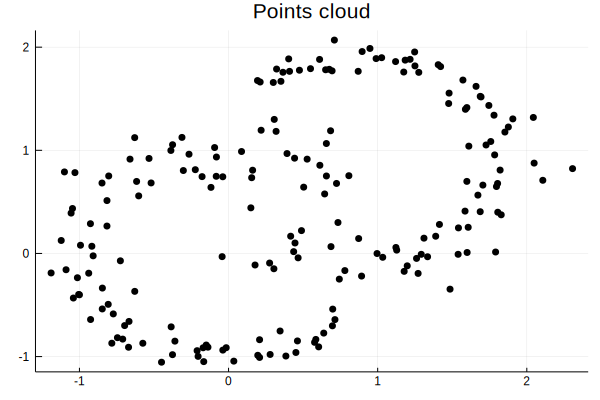

In [62]:
gr() # We will continue onward using the GR backend
plot(points_x, points_y, seriestype = :scatter, title = "Points cloud", label=false, color=:black)

In [63]:
# Create the Euclidean distance matrix

distance(a,b) = sqrt(sum((a .- b).^2))

D = zeros(N,N)
for i=1:N
    for j=1:N
        dist = distance(points[i],points[j])
        if i == j
            D[i,j] = Inf #we set it to Inf although it is 0. We don't want to include the point itself to nearest neighbour list
        else
            D[i,j] = dist
        end
    end
end

In [64]:
# find k nearest neighbour
k = 5
K = zeros(N,N)

for i=1:N
    k_list = Inf .* ones(k)
    ind_list = Int.(zeros(k))
    max_val = Inf
    argmax_val = 1
    for j=1:N
        if D[i,j]<max_val
            k_list[argmax_val] = D[i,j]
            ind_list[argmax_val] = j
            max_val = maximum(k_list)
            argmax_val = argmax(k_list)
        end
    end
    for j in ind_list
        K[i,j] = 1
    end
end

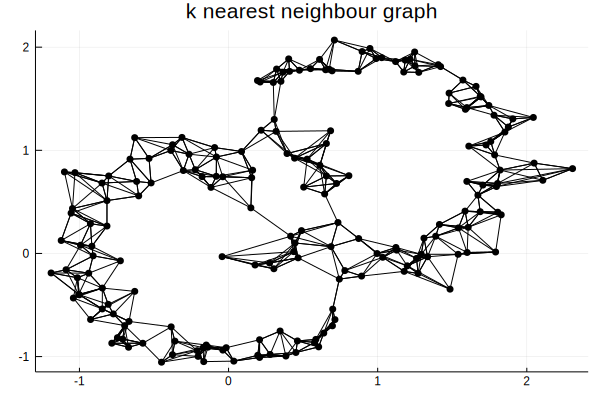

In [66]:
gr() # We will continue onward using the GR backend
plt = plot(points_x, points_y, seriestype = :scatter, title = "k nearest neighbour graph", label=false, color=:black)
for i=1:N
    for j=1:N
        if K[i,j] == 1
            plot!([points_x[i],points_x[j]],[points_y[i],points_y[j]],label=false, color=:black)
        end
    end
end
plt

In [67]:
# Create weight matrix
W = zeros(N,N)
for i=1:N
    for j=1:N
        if i==j || K[i,j] == 1
            W[i,j] = exp(-distance(points[i],points[j]))
            W[j,i] = W[i,j] #to retain symmetry. Notice this causes some points to have similarity metric with more than (k+1) points
        end
    end
end

In [83]:
a = reshape(sum(W,dims=1),(N,))
A = diagm(a)
S = A - W
L,Q = eigen(S)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
192-element Array{Float64,1}:
 0.0                 
 0.013848472037716775
 0.033473944842942416
 0.044806486240972276
 0.059076270011223286
 0.1106372237981752  
 0.14609333372510136 
 0.17905668489164484 
 0.21018616983169558 
 0.24951810528966334 
 0.3025113589578048  
 0.31847645444977957 
 0.5359858554438599  
 ⋮                   
 8.264653257905714   
 8.395684584770006   
 8.444491993992855   
 8.473657556285199   
 8.534642620377246   
 8.732304819328743   
 8.771838458583158   
 8.844199270553837   
 8.934194746476251   
 8.984098239509171   
 9.252669393261622   
 9.804330229216964   
eigenvectors:
192×192 Array{Float64,2}:
 -0.0721688   0.0749528   -0.105863   …   3.47016e-9    0.00199122 
 -0.0721688   0.0968299   -0.0656832      3.23113e-11   9.07206e-6 
 -0.0721688   0.0916209   -0.0819671     -1.76522e-10  -6.82353e-5 
 -0.0721688  -0.104521    -0.0201191     -0.117342      1.34295e-9 
 -0.0721688   0.

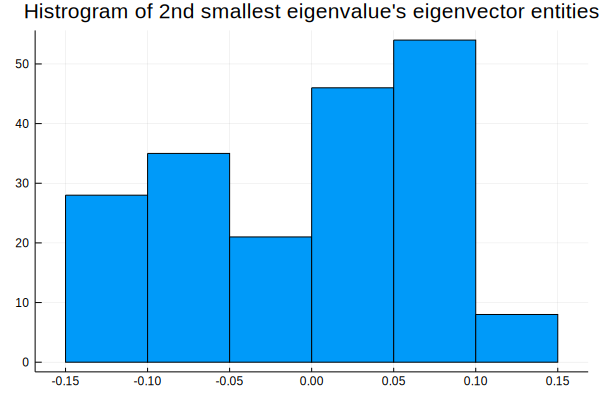

In [94]:
histogram(Q[:,2],title="Histrogram of 2nd smallest eigenvalue's eigenvector entities", label=false)

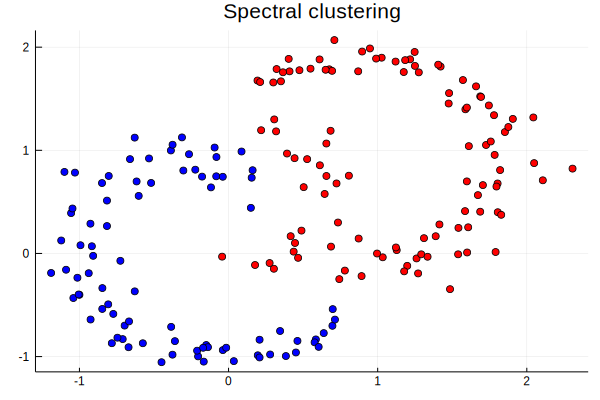

In [95]:
function choose_color(x)
    if x>0
        return :red
    else
        return :blue
    end
end
q = Q[:,2]
plt = plot((points_x[1], points_y[1]), seriestype = :scatter, title = "Spectral clustering", label=false, color=choose_color(q[1]))
for n=2:N
    plot!((points_x[n], points_y[n]), seriestype = :scatter, label=false, color=choose_color(q[n]))
end
plt